<a href="https://colab.research.google.com/github/AnnaBo1/Project-Flight-Delay-/blob/main/Project_Flight_Delay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*  📚  Importing Libraries and Loading Data:
---

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [6]:
data = pd.read_csv('/content/Airline_Delay_Cause.csv')

In [7]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171666 entries, 0 to 171665
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 171666 non-null  int64  
 1   month                171666 non-null  int64  
 2   carrier              171666 non-null  object 
 3   carrier_name         171666 non-null  object 
 4   airport              171666 non-null  object 
 5   airport_name         171666 non-null  object 
 6   arr_flights          171426 non-null  float64
 7   arr_del15            171223 non-null  float64
 8   carrier_ct           171426 non-null  float64
 9   weather_ct           171426 non-null  float64
 10  nas_ct               171426 non-null  float64
 11  security_ct          171426 non-null  float64
 12  late_aircraft_ct     171426 non-null  float64
 13  arr_cancelled        171426 non-null  float64
 14  arr_diverted         171426 non-null  float64
 15  arr_delay        

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0


*  🛠️ Data Cleaning
---

In [8]:
#Checking for Missing Values
print("\n--- Missing Data Check ---")
data.isnull().sum()


--- Missing Data Check ---


,0
year,0
month,0
carrier,0
carrier_name,0
airport,0
airport_name,0
arr_flights,240
arr_del15,443
carrier_ct,240
weather_ct,240


In [9]:
# Checking for Outliers
anomalies_count = data[(data['arr_flights'] == 0) | (data['arr_delay'] < 0)].shape[0]

if anomalies_count > 0:
    print(f"Outliers Detected: {anomalies_count}")
else:
    print("No Outliers Detected")

No Outliers Detected


In [10]:
# Checking for Duplicates
duplicates = data.duplicated().sum()
print(f"\n--- Number of Duplicates: {duplicates} ---")


--- Number of Duplicates: 0 ---


In [11]:
#NaN Removal
columns_to_fill_zero = [
    'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
    'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
    'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
    'security_delay', 'late_aircraft_delay'
]

for col in columns_to_fill_zero:
    data[col] = data[col].fillna(0)

In [12]:
print("\n--- **Checking for Missing Values After Processing**и ---")
data.isnull().sum()


--- **Checking for Missing Values After Processing**и ---


,0
year,0
month,0
carrier,0
carrier_name,0
airport,0
airport_name,0
arr_flights,0
arr_del15,0
carrier_ct,0
weather_ct,0


*  📊 **Creating Metrics**
---

In [13]:
#"Total Delay Time"
data['total_delay_minutes'] = (
    data['carrier_delay'] + data['weather_delay'] +
    data['nas_delay'] + data['security_delay'] +
    data['late_aircraft_delay']
)

In [14]:
# **Percentage of Delays Caused by the Airline**
data['perc_carrier_delay'] = (data['carrier_delay'] / data['total_delay_minutes'].replace(0, np.nan)) * 100

# **Percentage of Delays Caused by Weather Conditions**
data['perc_weather_delay'] = (data['weather_delay'] / data['total_delay_minutes'].replace(0, np.nan)) * 100

# **Percentage of Delays Caused by NAS (National Aviation System)**
data['perc_nas_delay'] = (data['nas_delay'] / data['total_delay_minutes'].replace(0, np.nan)) * 100

# **Percentage of Delays Caused by Security Measures**
data['perc_security_delay'] = (data['security_delay'] / data['total_delay_minutes'].replace(0, np.nan)) * 100

# **Percentage of Delays Caused by Late Arrival of Aircraft**
data['perc_late_aircraft_delay'] = (data['late_aircraft_delay'] / data['total_delay_minutes'].replace(0, np.nan)) * 100

In [15]:
# Validating New Metrics
data[['perc_carrier_delay', 'perc_weather_delay',
            'perc_nas_delay', 'perc_security_delay',
            'perc_late_aircraft_delay']].head()

,perc_carrier_delay,perc_weather_delay,perc_nas_delay,perc_security_delay,perc_late_aircraft_delay
0,5.163636,55.345455,8.581818,0.0,30.909091
1,27.284105,0.125156,7.759700,0.0,64.831039
2,7.310705,24.543081,10.182768,0.0,57.963446
3,33.715104,22.906228,27.773801,0.0,15.604868
4,41.045752,0.000000,8.758170,0.0,50.196078


In [16]:
# **Checking for Missing Values in New Metrics**
data[['perc_carrier_delay', 'perc_weather_delay',
            'perc_nas_delay', 'perc_security_delay',
            'perc_late_aircraft_delay']].isnull().sum()

,0
perc_carrier_delay,7028
perc_weather_delay,7028
perc_nas_delay,7028
perc_security_delay,7028
perc_late_aircraft_delay,7028


In [17]:
# **Replacing NaN with 0 in New Metrics**
new_metrics = ['perc_carrier_delay', 'perc_weather_delay',
               'perc_nas_delay', 'perc_security_delay',
               'perc_late_aircraft_delay']

for col in new_metrics:
    data[col] = data[col].fillna(0)

data[new_metrics].isnull().sum()

,0
perc_carrier_delay,0
perc_weather_delay,0
perc_nas_delay,0
perc_security_delay,0
perc_late_aircraft_delay,0


In [18]:
# **Validating New Metrics**
data[['perc_carrier_delay', 'perc_weather_delay',
            'perc_nas_delay', 'perc_security_delay',
            'perc_late_aircraft_delay']].tail()

,perc_carrier_delay,perc_weather_delay,perc_nas_delay,perc_security_delay,perc_late_aircraft_delay
171661,78.26087,0.0,21.73913,0.0,0.0
171662,0.00000,0.0,0.00000,0.0,100.0
171663,0.00000,0.0,0.00000,0.0,0.0
171664,100.00000,0.0,0.00000,0.0,0.0
171665,0.00000,0.0,0.00000,0.0,0.0


*  🔍 Data Analysis: Pivot Tables and Visualizations
---

# ***Trends and Time Analysis:***

**1.  How does the number of delayed flights change over the years??**

---

In [19]:
# **Data Aggregation by Year**
yearly_trends = data.groupby('year')['arr_del15'].sum().reset_index()

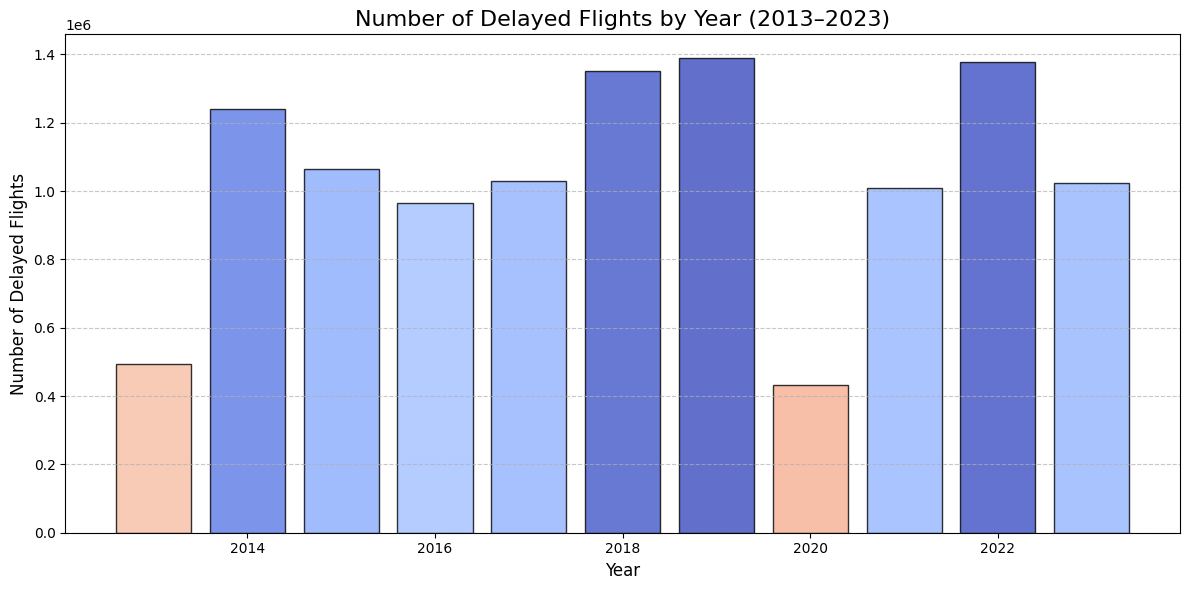

In [20]:
normalized_values = yearly_trends['arr_del15'] / yearly_trends['arr_del15'].max()
colors = sns.color_palette("coolwarm_r", as_cmap=True)(normalized_values)  # Інверсія coolwarm за допомогою '_r'

plt.figure(figsize=(12, 6))
plt.bar(
    yearly_trends['year'],
    yearly_trends['arr_del15'],
    color= colors,
    edgecolor='black',
    alpha=0.8
)

plt.title('Number of Delayed Flights by Year (2013–2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Delayed Flights', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

**Key Insight:**

The number of delayed flights steadily increased from 2013 to 2019.

In 2020, the number of delays dropped significantly (likely due to the COVID-19 pandemic).

In 2022, a new peak in delays was observed.






**2. Is there a relationship between the number of flights and delays??**

---

Correlation Analysis Between Flight Volume and Number of Delays

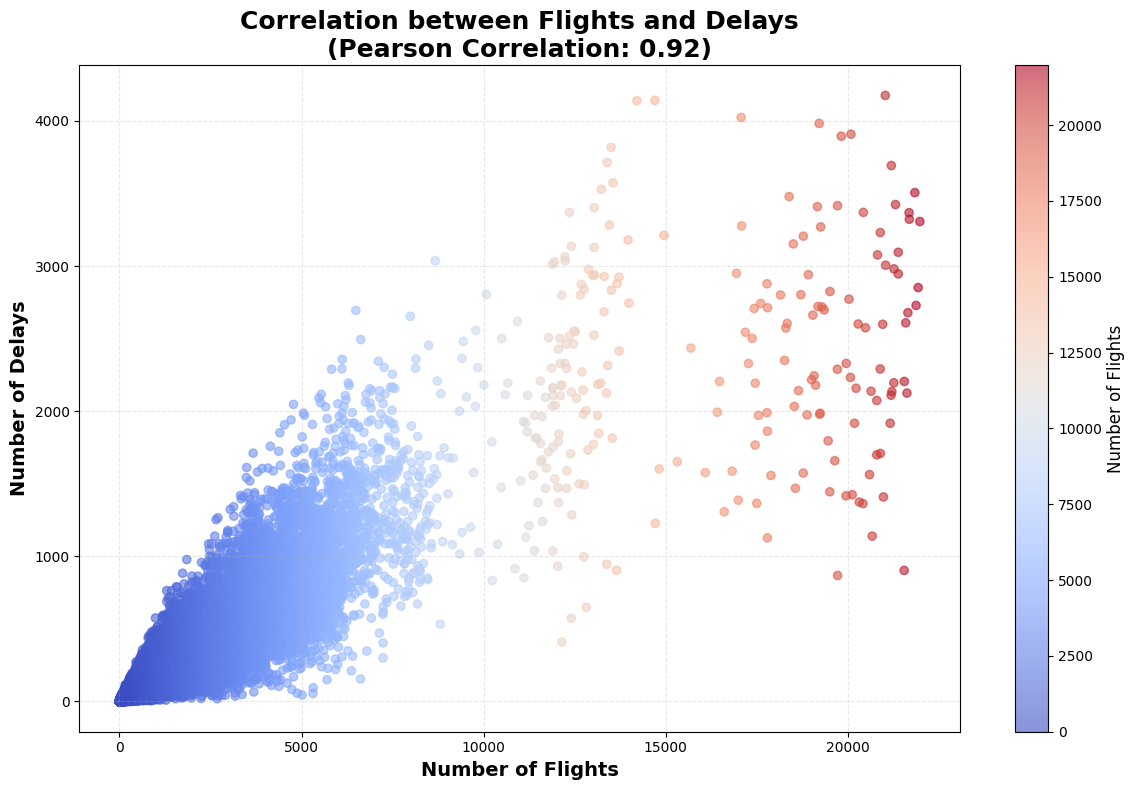

Pearson Correlation Coefficient: 0.92
P-Value:: 0.0000


In [22]:
# Calculating Pearson Correlation Coefficient
correlation, p_value = pearsonr(data['arr_flights'], data['arr_del15'])

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x=data['arr_flights'],
    y=data['arr_del15'],
    c=data['arr_flights'],
    cmap='coolwarm',
    alpha=0.6
)

cbar = plt.colorbar()
cbar.set_label('Number of Flights', fontsize=12)

plt.title(f'Correlation between Flights and Delays\n(Pearson Correlation: {correlation:.2f})', fontsize=18, weight='bold')
plt.xlabel('Number of Flights', fontsize=14, weight='bold')
plt.ylabel('Number of Delays', fontsize=14, weight='bold')

plt.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print(f"Pearson Correlation Coefficient: {correlation:.2f}")
print(f"P-Value:: {p_value:.4f}")

**Key Insights:**

*  Strong Positive Correlation (0.92):

There is a strong positive relationship between the number of flights and the number of delays. As the number of flights increases, delays also rise significantly.

*  P-Value (0.0000):

The very low P-value (< 0.05) indicates that the result is statistically significant.
    
*  Practical Implication:

These findings highlight the need for better resource management during high traffic periods to mitigate delays effectively.

**3.What is the seasonality of delays by month over the years (2013–2023)???**

---

Overall Monthly Trend + Peaks in Delays.


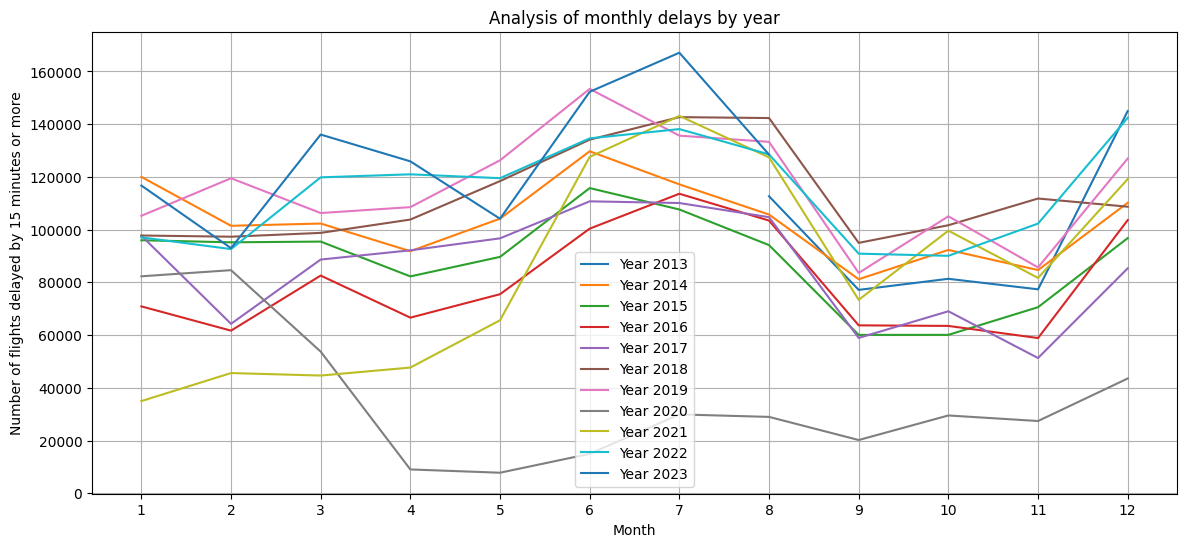

In [23]:
# monthly delays by year
monthly_delays = data.groupby(['year', 'month'])['arr_del15'].sum().reset_index()
plt.figure(figsize=(14, 6))
for year in sorted(monthly_delays['year'].unique()):
    monthly_data = monthly_delays[monthly_delays['year'] == year]
    plt.plot(monthly_data['month'], monthly_data['arr_del15'], label=f'Year {year}')
plt.title('Analysis of monthly delays by year')
plt.xlabel('Month')
plt.ylabel('Number of flights delayed by 15 minutes or more')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.show()

**Key Insights:**

Delays over the years consistently exhibit seasonality, with peaks in summer (June–August) and minimums in winter (January–February).

This highlights a general yearly trend that remains stable across multiple years.

In [24]:
#  Total Delays by Month
monthly_total_delays_df = data.groupby('month', observed=False)['arr_del15'].sum().reset_index()
monthly_total_delays_df.columns = ['Month', 'Total Delays']

monthly_total_delays_df.sort_values(by='Total Delays', ascending=False, inplace=True)

monthly_total_delays_df

,Month,Total Delays
7,8,1209494.0
6,7,1204979.0
5,6,1173371.0
11,12,1081504.0
2,3,928208.0
0,1,918519.0
4,5,907663.0
1,2,855134.0
3,4,848691.0
9,10,792054.0


**Key Insights:**

**The highest delay rates are observed in August (1,209,494 flights), followed by July (1,204,979 flights) and June (1,173,371 flights).**  
This indicates a summer season peak in delays, likely due to increased demand.

**The lowest number of delays is recorded in September (703,938 flights) and November (751,540 flights),** reflecting a quieter period with reduced travel activity during these months.

**Delays rise again in December (1,081,504 flights),** potentially linked to the holiday season and increased flight volume.

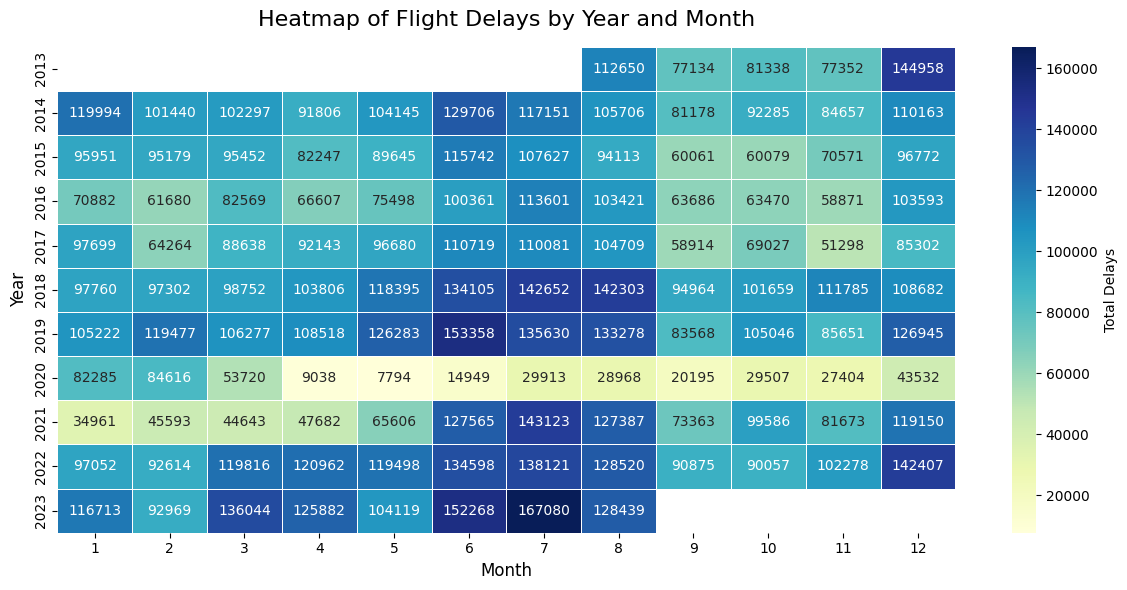

In [25]:
# Flight Delays by Year and Month
heatmap_data = data.pivot_table(
    index='year',
    columns='month',
    values='arr_del15',
    aggfunc='sum'
)

plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".0f",
    cmap='YlGnBu',
    linewidths=0.5,
    cbar_kws={'label': 'Total Delays'}
)

plt.title('Heatmap of Flight Delays by Year and Month', fontsize=16, pad=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.tight_layout()

plt.show()

**Key Insights:**

Summer months (June, July, August) consistently show the highest number of delays across all years, with peaks observed in 2019.

Post-2020 (pandemic), the overall number of delays decreased, but the trend of summer peaks persisted.

 ***4. Is There Seasonality in Delays?***

---




In [26]:
# **Adding Seasons**
data['Season'] = data['month'].apply(lambda x:
    'Winter' if x in [12, 1, 2] else
    'Spring' if x in [3, 4, 5] else
    'Summer' if x in [6, 7, 8] else 'Autumn'
)

seasonal_trends = data.groupby('Season')['arr_del15'].sum().sort_values(ascending=False).reset_index()

seasonal_trends.rename(columns={'arr_del15': 'Total Delays'}, inplace=True)
seasonal_trends

,Season,Total Delays
0,Summer,3587844.0
1,Winter,2855157.0
2,Spring,2684562.0
3,Autumn,2247532.0


**Key Insights:**

Yes, seasonality is clearly observed. Summer is the most problematic season with the highest total number of delays (3,587,844 flights), while autumn has the fewest delays (2,247,532 flights).

This highlights the overall impact of seasons on delays rather than an annual trend.



**5. How Did the Number of Delays Change Before and After the 2020 Pandemic?**

---

Average number of delays before the pandemic (pre-2020): 76.43
Average number of delays after the pandemic (2020 and later): 55.98


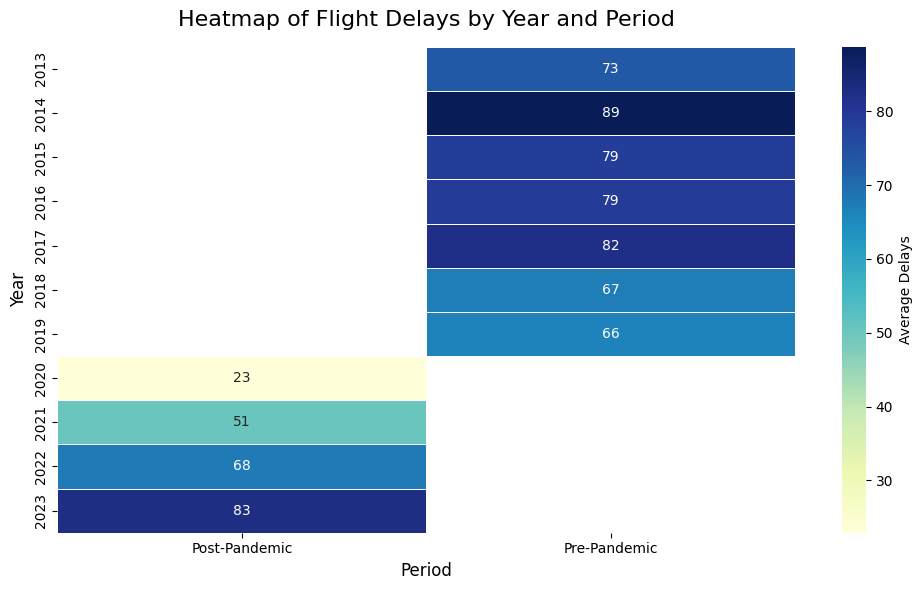

In [28]:
# Adding Period (Pre-Pandemic or Post-Pandemic)
data['Period'] = data['year'].apply(lambda x: 'Pre-Pandemic' if x < 2020 else 'Post-Pandemic')

# Calculating Average Delays for Each Year
average_delays = data.groupby(['Period', 'year'])['arr_del15'].mean().reset_index()

# Average Delays Before and After 2020
before_pandemic = average_delays[average_delays['year'] < 2020]['arr_del15'].mean()
after_pandemic = average_delays[average_delays['year'] >= 2020]['arr_del15'].mean()

print(f"Average number of delays before the pandemic (pre-2020): {before_pandemic:.2f}")
print(f"Average number of delays after the pandemic (2020 and later): {after_pandemic:.2f}")

heatmap_data = average_delays.pivot(index='year', columns='Period', values='arr_del15')

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".0f",
    cmap='YlGnBu',
    linewidths=0.5,
    cbar_kws={'label': 'Average Delays'}
)

plt.title('Heatmap of Flight Delays by Year and Period', fontsize=16, pad=15)
plt.xlabel('Period', fontsize=12)
plt.ylabel('Year', fontsize=12)

plt.tight_layout()

plt.show()

**Key Insight:**

*  Before the pandemic (Pre-Pandemic), the average number of delays remained stable, peaking at 67 in 2018.

*  During the pandemic in 2020, the average number of delays sharply dropped to 23.

*  Post-Pandemic, the number of delays has gradually increased, reaching 83 in 2023.

# **Reasons for Delays:**

**6.What is the most common cause of delays?**

---

In [29]:
delay_reasons = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']

# Calculating the total number of delays for each cause.
delay_sums = data[delay_reasons].sum().reset_index(name='Total Delays')
delay_sums.columns = ['Reason', 'Total Delays']

delay_sums = delay_sums.sort_values(by='Total Delays', ascending=False)

print("\n--- The most common causes of delays. ---")
delay_sums


--- The most common causes of delays. ---


,Reason,Total Delays
4,late_aircraft_ct,4074891.00
0,carrier_ct,3565080.59
2,nas_ct,3322432.52
1,weather_ct,385767.94
3,security_ct,26930.39


**Key Insight:**

The most common cause of delays is late aircraft arrival (4,074,891 flights), significantly surpassing other factors.

**7. How does the share of delays by cause change throughout the year?**

---


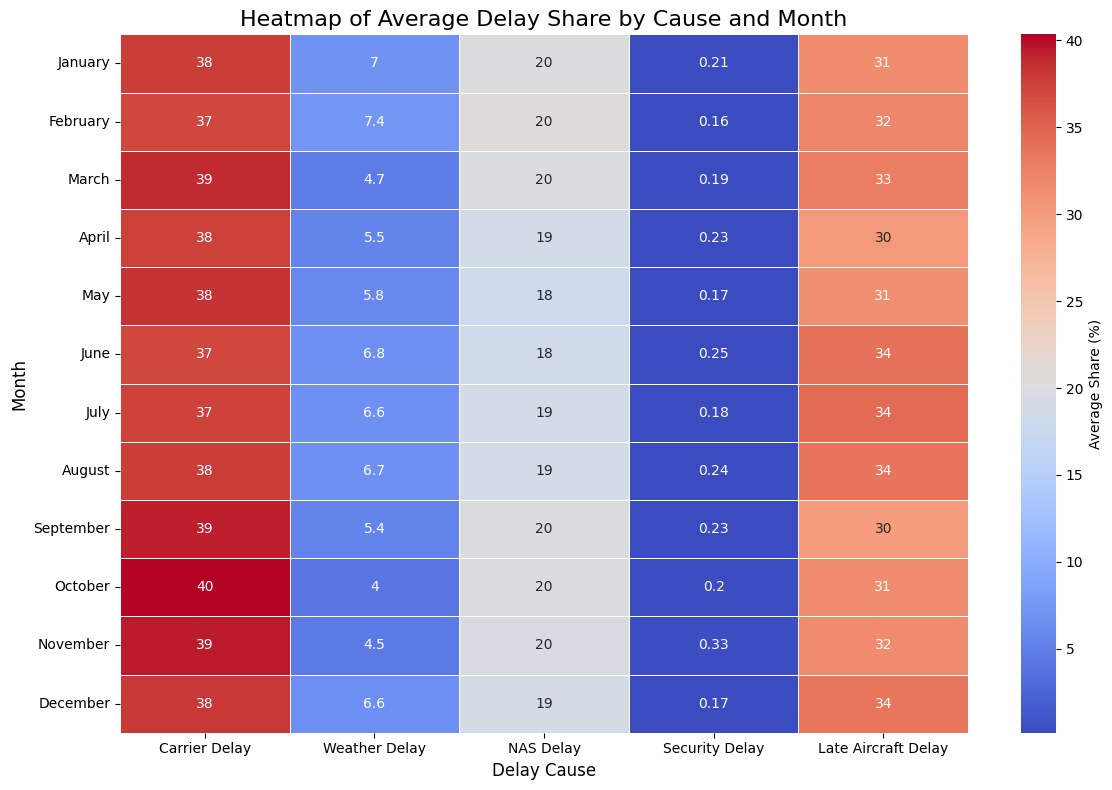

In [30]:
# Calculating average shares of delays by cause for each month.
monthly_cause_shares = data.groupby('month')[[
    'perc_carrier_delay', 'perc_weather_delay',
    'perc_nas_delay', 'perc_security_delay',
    'perc_late_aircraft_delay'
]].mean()

monthly_cause_shares.rename(columns={
    'perc_carrier_delay': 'Carrier Delay',
    'perc_weather_delay': 'Weather Delay',
    'perc_nas_delay': 'NAS Delay',
    'perc_security_delay': 'Security Delay',
    'perc_late_aircraft_delay': 'Late Aircraft Delay'
}, inplace=True)

monthly_cause_shares.index = monthly_cause_shares.index.map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

plt.figure(figsize=(12, 8))
sns.heatmap(
    monthly_cause_shares,
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={'label': 'Average Share (%)'}
)

plt.title('Heatmap of Average Delay Share by Cause and Month', fontsize=16)
plt.xlabel('Delay Cause', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.tight_layout()
plt.show()



**Key Insight:**

Carrier delays and late aircraft delays dominate throughout the year, while security delays have minimal impact. Weather delays slightly increase in winter months.

**8. Which cause of delays has the longest average duration??**

---



In [31]:
result = (
    data[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']]
    .mean()
    .round(2)
    .reset_index()
    .rename(columns={'index': 'Cause', 0: 'Average Delay (minutes)'})
    .sort_values(by='Average Delay (minutes)', ascending=False)
)

display(result)

,Cause,Average Delay (minutes)
4,late_aircraft_delay,1649.39
0,carrier_delay,1435.18
2,nas_delay,919.36
1,weather_delay,222.25
3,security_delay,7.37


**Key Insight:**

*  Late Aircraft Delay has the longest average duration, approximately 1650 minutes.

*  Carrier Delay (delays caused by airline-related issues) ranks second with an average duration of about 1435 minutes

*  The shortest average delay is observed in Security Delay, lasting only about 7.37 minutes.

These insights highlight the need to focus on the causes with the longest delays to improve operational efficiency.

# **Comparison of Airlines and Airports**

**9.  Which airlines have the fewest delays?**

---

Identifying the top-performing carriers with the least number of delays.

In [32]:
# Pivot table to calculate the average delays by airline.
pivot_table_carrier = pd.pivot_table(
    data,
    values='arr_del15',
    index='carrier_name',
    aggfunc='mean'
).reset_index()

pivot_table_carrier.columns = ['Carrier Name', 'Average Delays']

pivot_table_carrier['Average Delays'].round(2)

top_carriers_pivot = pivot_table_carrier.sort_values(by='Average Delays', ascending=True)

top_carriers_pivot

,Carrier Name,Average Delays
2,Allegiant Air,18.109058
9,ExpressJet Airlines LLC,20.662953
12,Horizon Air,24.789974
6,Endeavor Air Inc.,26.413670
14,Mesa Airlines Inc.,26.663531
10,Frontier Airlines Inc.,32.004723
7,Envoy Air,33.200824
15,PSA Airlines Inc.,37.422940
1,Alaska Airlines Inc.,37.974184
11,Hawaiian Airlines Inc.,41.629115


**Key Insights:**

Allegiant Air has the fewest delays (18.11 average delayed flights),

 while Hawaiian Airlines has the most among the top 10 (41.63).

**Recommendation:** Choose Allegiant Air or ExpressJet for fewer delays.

**10.Which airports have the longest average delay duration?**

---

In [33]:
# A pivot table with average delays by airports.
pivot_table_airport = pd.pivot_table(
    data,
    values='arr_delay',
    index='airport_name',
    aggfunc='mean'
).sort_values(by='arr_delay', ascending=False).head(10)

pivot_table_airport.rename(columns={'arr_delay': 'Average Delay (minutes)'}, inplace=True)
display(pivot_table_airport)

,Average Delay (minutes)
airport_name,
"Chicago, IL: Chicago O'Hare International",28688.190510
"Dallas/Fort Worth, TX: Dallas/Fort Worth International",26513.337218
"Atlanta, GA: Hartsfield-Jackson Atlanta International",23149.151656
"Denver, CO: Denver International",21660.027842
"San Francisco, CA: San Francisco International",19627.079536
"Las Vegas, NV: Harry Reid International",18241.174721
"New York, NY: John F. Kennedy International",17999.301788
"Sanford, FL: Orlando Sanford International",17022.191176
"Los Angeles, CA: Los Angeles International",17000.976035


**Key Insight:**

Chicago O'Hare International has the highest average delay duration (28,688.19 minutes).

Other major airports with significant delays include:

Dallas/Fort Worth International (26,513.34 minutes).

Atlanta Hartsfield-Jackson International (23,149.15 minutes).

**11. What is the average delay in minutes by carrier??**

---

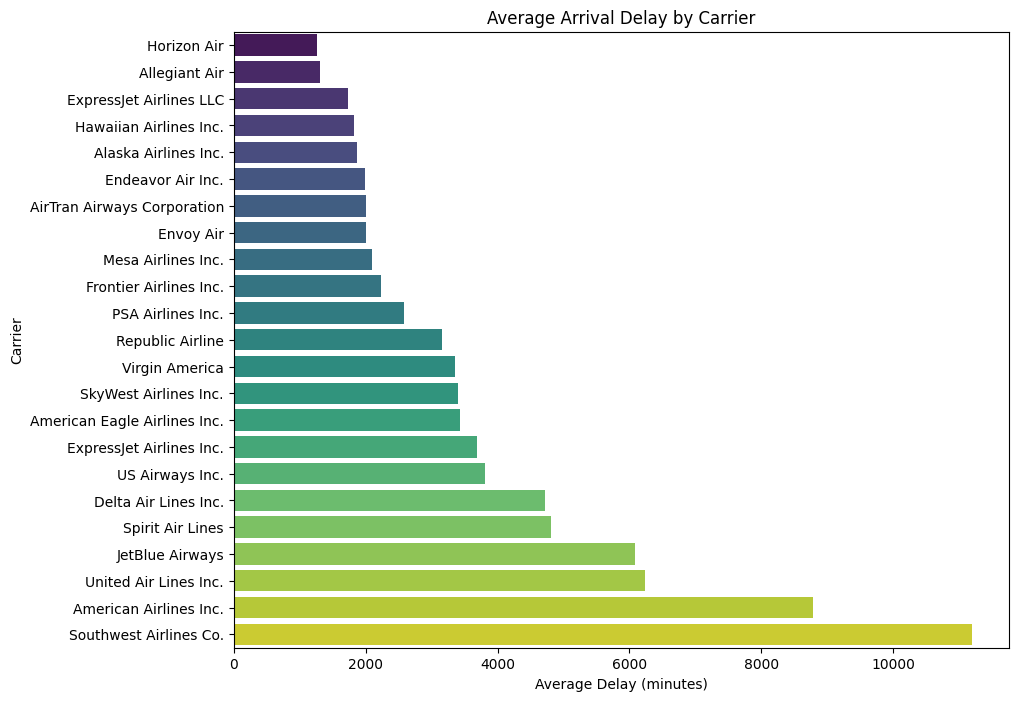

In [34]:
carrier_delay_avg = data.groupby('carrier_name')['arr_delay'].mean().sort_values()

plt.figure(figsize=(10, 8))

palette = sns.color_palette("viridis", len(carrier_delay_avg))

sns.barplot(
    x=carrier_delay_avg,
    y=carrier_delay_avg.index,
    hue=carrier_delay_avg.index,
    dodge=False,
    palette=palette,
    legend=False
)

plt.title('Average Arrival Delay by Carrier')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Carrier')
plt.show()


**Key Insight:**

Southwest Airlines has the highest average delay (over 10,000 minutes), while Horizon Air shows the lowest average delay among carriers.

*  💡 Conclusions and recommendations:
---

**Conclusion:**

The analysis of flight delay data in the U.S. from 2013 to 2023 revealed several key trends and insights. Delays exhibit a clear seasonal pattern, with the highest numbers occurring in the summer months and the lowest during winter. This indicates significant pressure on aviation infrastructure during peak travel seasons.

The COVID-19 pandemic had a substantial impact on delays, evident in 2020 when flight volumes and delays dropped drastically. By 2022–2023, delays had nearly returned to pre-pandemic levels, although their distribution remained uneven.

The most common cause of delays is late aircraft arrivals, highlighting systemic inefficiencies in managing flight schedules. Other factors, such as weather or carrier-related delays, also play a role but are less significant.

Among carriers, Horizon Air demonstrates the best punctuality, while Southwest Airlines experiences the highest average delays. As for airports, Chicago O'Hare International stands out with the largest average delays, emphasizing the need for infrastructure optimization.

**Recommendations:**

1. For Airlines:

*  Optimize schedule management to prevent delays caused by late aircraft arrivals.
*  Allocate additional resources during the summer season to handle peak demand effectively.
*  Study and adapt Horizon Air's practices to reduce average delay times.

2. For Airports:

*  Invest in infrastructure upgrades at major hubs like Chicago O'Hare to minimize delays caused by congestion.
*  Develop strategies to mitigate weather-related delays during winter, such as enhanced snow removal equipment.

3. For Passengers:

*  Plan travel during less busy seasons, such as winter or autumn, to reduce the risk of delays.
*  Choose carriers with better punctuality records, such as Horizon Air, for more reliable travel.

5. For Regulatory Bodies:

*  Focus on monitoring the performance of major hubs and support innovations that improve operational efficiency.
*  Introduce incentives for airlines that reduce delays and enhance passenger experience.